In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("D:\BISI\level 2\CST2212\OPS-PM Baseline Cost (Synthetic).xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          64 non-null     int64  
 1   Change Request Title  64 non-null     object 
 2   Work Classification   64 non-null     object 
 3   Priority              64 non-null     object 
 4   Application Name      64 non-null     object 
 5   IT Directorate        64 non-null     object 
 6   IT Division           64 non-null     object 
 7   IT Section            64 non-null     object 
 8   Manager ID            64 non-null     int64  
 9   Effort Cost           64 non-null     float64
 10  Capacity to Deliver   64 non-null     object 
 11  Actuals               64 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 6.1+ KB


In [4]:
df.isnull().sum()

Order Number            0
Change Request Title    0
Work Classification     0
Priority                0
Application Name        0
IT Directorate          0
IT Division             0
IT Section              0
Manager ID              0
Effort Cost             0
Capacity to Deliver     0
Actuals                 0
dtype: int64

In [5]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61     True
62    False
63    False
Length: 64, dtype: bool

In [6]:
df['Order Number '] = df['Order Number '].astype(str)
df['Manager ID'] = df['Manager ID'].astype(str)

In [7]:
df.describe()

,Effort Cost,Actuals
count,64.000000,64.000000
mean,51483.008179,74219.899063
std,103159.499199,128705.567171
min,0.000000,0.000000
25%,29769.750000,13018.633333
50%,34571.000000,35223.260000
75%,39242.635010,70243.376006
max,815982.000000,634237.546746


In [8]:
df.corr()

C:\Users\zhuan\AppData\Local\Temp\ipykernel_26628\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Effort Cost,Actuals
Effort Cost,1.000000,0.646939
Actuals,0.646939,1.000000


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['difference'] = df['Actuals'] - df['Effort Cost'] 
df['percent_change'] = (df['difference'] / df['Effort Cost'])
df[['difference', 'percent_change']].describe()

,difference,percent_change
count,63.000000,55.000000
mean,23335.340104,0.755296
std,100828.512408,2.889442
min,-181744.453254,-1.000000
25%,-13514.646674,-0.373041
50%,565.125576,0.019198
75%,22360.696678,0.597729
max,588738.900391,17.225114


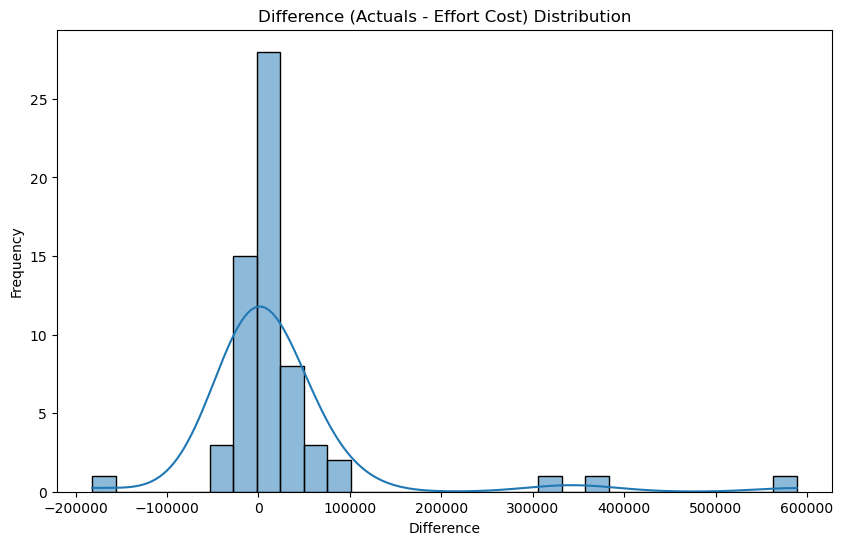

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['difference'], bins=30, kde=True)
plt.title('Difference (Actuals - Effort Cost) Distribution')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

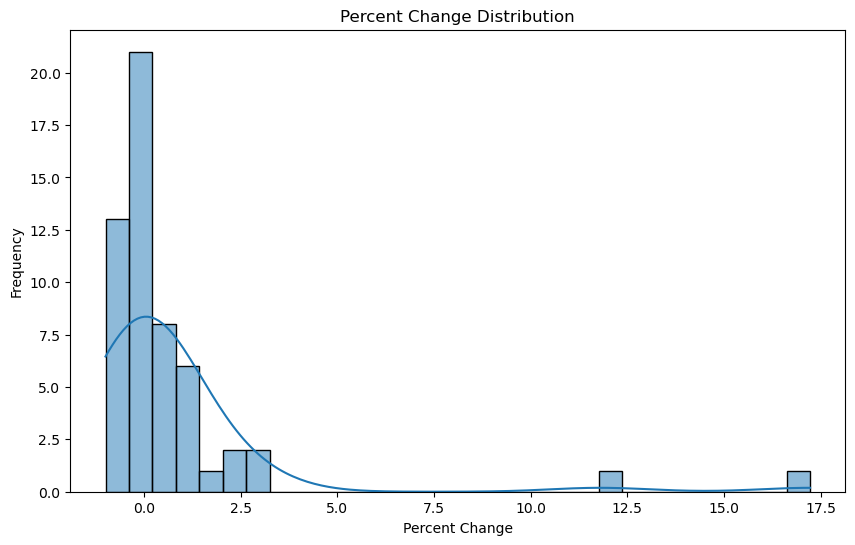

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['percent_change'], bins=30, kde=True)
plt.title('Percent Change Distribution')
plt.xlabel('Percent Change')
plt.ylabel('Frequency')
plt.show()

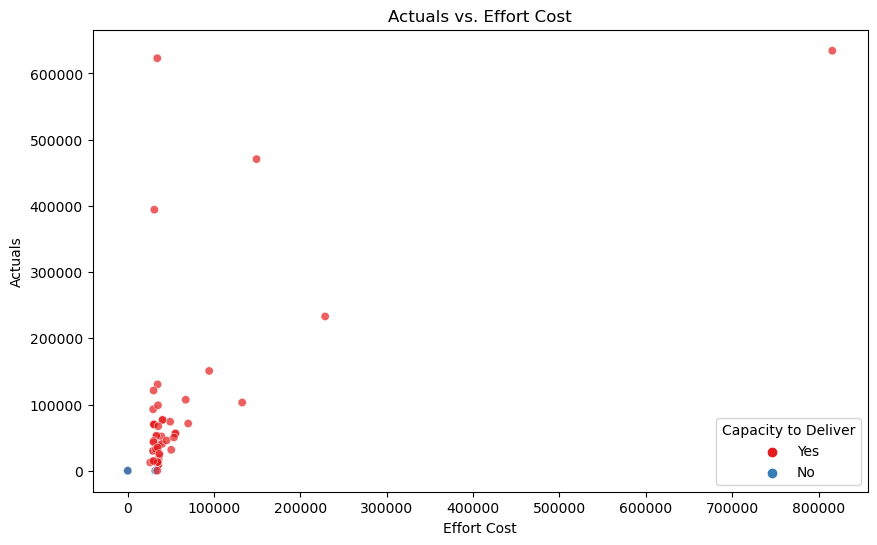

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Effort Cost', y='Actuals', hue='Capacity to Deliver', palette='Set1', alpha=0.7)
plt.title('Actuals vs. Effort Cost')
plt.xlabel('Effort Cost')
plt.ylabel('Actuals')
plt.legend(title='Capacity to Deliver')
plt.show()

In [14]:
df.head()

,Order Number,Change Request Title,Work Classification,Priority,Application Name,IT Directorate,IT Division,IT Section,Manager ID,Effort Cost,Capacity to Deliver,Actuals,difference,percent_change
0,161199,Sub-Project-4,Development,Low,Application A,DIR-1,Div-1,Sec-1,485317370,29414.500000,Yes,92798.636954,63384.136954,2.154860
1,161454,Sub-Project-1,Development,Low,Application A,DIR-1,Div-1,Sec-1,485317370,149149.421875,Yes,470545.583046,321396.161171,2.154860
2,161199,Sub-Project-4,Development,Low,Application A,DIR-1,Div-1,Sec-6,485317372,26029.000000,Yes,12603.025171,-13425.974829,-0.515808
3,161277,Sub-Project-7,Enhancement,Low,Application A,DIR-1,Div-1,Sec-6,485317372,35841.599609,Yes,17354.204235,-18487.395374,-0.515808
4,161454,Sub-Project-1,Development,Low,Application A,DIR-1,Div-1,Sec-6,485317372,30544.000000,Yes,14789.150594,-15754.849406,-0.515808


In [15]:
correlation = df.groupby('Capacity to Deliver')['Actuals'].corr(df['Actuals'])
print("Correlation between Capacity to Deliver and Actuals:")
print(correlation)

Correlation between Capacity to Deliver and Actuals:
Capacity to Deliver
No     NaN
Yes    1.0
Name: Actuals, dtype: float64


In [74]:
df.corr()

C:\Users\zhuan\AppData\Local\Temp\ipykernel_26628\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Effort Cost,percent_change
Effort Cost,1.000000,-0.039128
percent_change,-0.039128,1.000000


In [16]:
df['percent_change']= df['percent_change'].fillna(0)

In [17]:
#df_new = df
#drop outlier
df.drop(df[df['percent_change'] == 1722.511439].index, inplace=True)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
df = df.drop('Change Request Title', axis=1)
#df = df.drop('Capacity to Deliver', axis=1)
df = df.drop('Actuals', axis=1)
df = df.drop('difference', axis=1)
#df = df.drop('IT Directorate', axis=1)
#df = df.drop('IT Division', axis=1)
X = df.drop('percent_change', axis=1)
y = df['percent_change']

In [20]:
# Label Encoding for 'Priority'
le_priority = LabelEncoder()
X['Priority'] = le_priority.fit_transform(X['Priority'])

# Label Encoding for 'Manager ID'
#le_manager_id = LabelEncoder()
#X['Manager ID'] = le_manager_id.fit_transform(X['Manager ID'])

# Label Encoding for 'Application Name'
le_application_name = LabelEncoder()
X['Application Name'] = le_application_name.fit_transform(X['Application Name'])

In [21]:
# Target encoding for 'Manager ID'

from sklearn.model_selection import KFold

# Reset the indexes of X and y to ensure index consistency
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare a new column for storing the value of the target code
X['Manager Target Encoding'] = np.nan

for train_index, val_index in kf.split(X):
    # Split X and y into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train = y.iloc[train_index]

    # Calculate the mean value of the target variable (difference) for each Manager ID on the training set
    manager_means = X_train.join(y_train, how='inner').groupby('Manager ID')['percent_change'].mean()

    # Apply the calculated average to the Manager ID of the validation set
    X_val['Manager Target Encoding Temp'] = X_val['Manager ID'].map(manager_means)
    
    # Update the original DataFrame with the target encoding values calculated from the validation set
    X.loc[val_index, 'Manager Target Encoding'] = X_val['Manager Target Encoding Temp']

# Remove the temporary column (if created) and dispose of any remaining NaN values
X.drop('Manager Target Encoding Temp', axis=1, inplace=True, errors='ignore')
X['Manager Target Encoding'].fillna(0, inplace=True)

# Option to remove the original Manager ID column from X
X = X.drop('Manager ID', axis=1)


C:\Users\zhuan\AppData\Local\Temp\ipykernel_26628\484083475.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Manager Target Encoding Temp'] = X_val['Manager ID'].map(manager_means)
C:\Users\zhuan\AppData\Local\Temp\ipykernel_26628\484083475.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['Manager Target Encoding Temp'] = X_val['Manager ID'].map(manager_means)
C:\Users\zhuan\AppData\Local\Temp\ipykernel_26628\484083475.py:24: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [22]:
# Frequency Encoding for 'Application Name', 'IT Division', 'IT Section', 'Manager ID'
#for column in ['IT Division', 'IT Section']:
#    frequency_encoding = X[column].value_counts(normalize=True)
#    X[column] = X[column].map(frequency_encoding)

In [23]:
# One-Hot Encoding for 'Order Number', 'Work Classification', 'IT Directorate'
# We can use pandas get_dummies or OneHotEncoder. Here, we will use get_dummies.
#X = pd.get_dummies(X, columns=['Order Number ', 'Work Classification', 'IT Directorate'], drop_first=True)
X = pd.get_dummies(X, columns=['Order Number ', 'Work Classification', 'Capacity to Deliver', 'IT Section', 'IT Directorate', 'IT Division'], drop_first=True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
X_train['Effort Cost'] = scaler.fit_transform(X_train[['Effort Cost']])
X_test['Effort Cost'] = scaler.transform(X_test[['Effort Cost']])

In [27]:
X.isnull().sum()

Priority                   0
Application Name           0
Effort Cost                0
Manager Target Encoding    0
Order Number _158394       0
                          ..
IT Division_Div-5          0
IT Division_Div-6          0
IT Division_Div-7          0
IT Division_Div-8          0
IT Division_Div-9          0
Length: 66, dtype: int64

In [28]:
X.head()

,Priority,Application Name,Effort Cost,Manager Target Encoding,Order Number _158394,Order Number _159417,Order Number _161097,Order Number _161127,Order Number _161199,Order Number _161214,...,IT Division_Div-13,IT Division_Div-14,IT Division_Div-2,IT Division_Div-3,IT Division_Div-4,IT Division_Div-5,IT Division_Div-6,IT Division_Div-7,IT Division_Div-8,IT Division_Div-9
0,2,0,29414.500000,2.154860,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,149149.421875,2.154860,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,26029.000000,-0.515808,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,35841.599609,-0.515808,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,30544.000000,-0.515808,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("保留的特征数量:", pca.n_components_)

# 查看解释的方差比率（每个主成分的贡献）
print("解释的方差比率:", pca.explained_variance_ratio_)


保留的特征数量: 25
解释的方差比率: [0.09350584 0.07887654 0.0778135  0.07185212 0.05914782 0.05366228
 0.0490052  0.04745648 0.0417463  0.03977576 0.03686173 0.03485724
 0.03135705 0.02832636 0.02638234 0.02415481 0.02092822 0.02059428
 0.01952186 0.01923694 0.01913237 0.01874057 0.01868711 0.01293973
 0.01227357]


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train_LR = model.predict(X_train)
y_pred_test_LR = model.predict(X_test)

coefficients = model.coef_
intercept = model.intercept_
y_pred_test_LR
coefficients
intercept

4.247289654260962

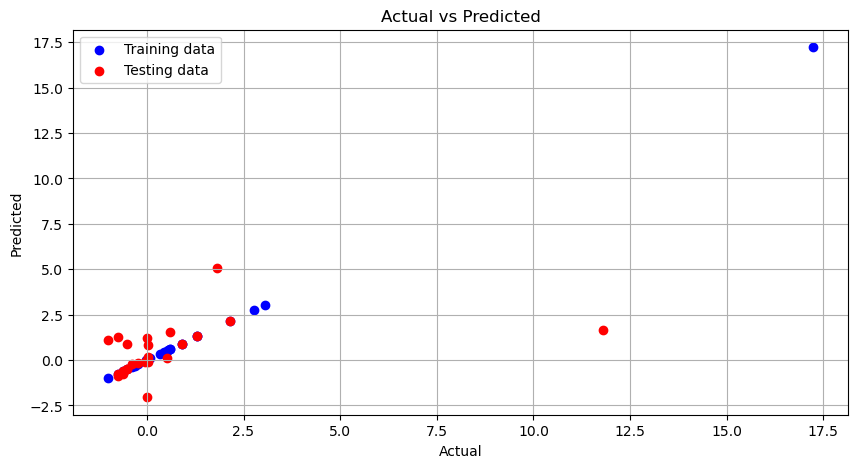

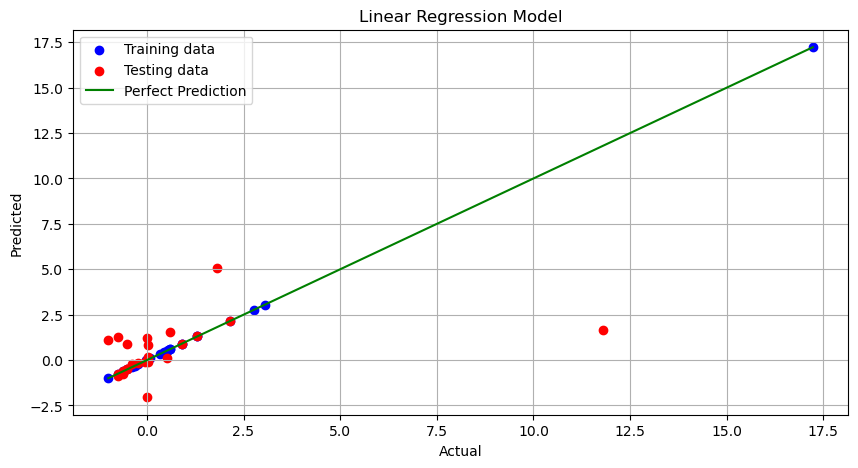

Training RMSE: 9.13725271619684e-15
Testing RMSE: 2.250037056751606


In [34]:
# 计算训练集和测试集的均方根误差
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_LR))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_LR))

# 绘制预测值与实际值的对比散点图
plt.figure(figsize=(10, 5))

plt.scatter(y_train, y_pred_train_LR, color='blue', label='Training data')
plt.scatter(y_test, y_pred_test_LR, color='red', label='Testing data')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)

plt.show()

# 绘制模型图示
plt.figure(figsize=(10, 5))

# 绘制训练集的散点图
plt.scatter(y_train, y_pred_train_LR, color='blue', label='Training data')

# 绘制测试集的散点图
plt.scatter(y_test, y_pred_test_LR, color='red', label='Testing data')

# 绘制对角线，表示完美预测
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         color='green', label='Perfect Prediction')

plt.title('Linear Regression Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)

plt.show()

print("Training RMSE:", rmse_train)
print("Testing RMSE:", rmse_test)



In [64]:
mse_train_LR = mean_squared_error(y_train, y_pred_train_LR)
rmse_train_LR = np.sqrt(mse_train_LR)
mae_train_LR = mean_absolute_error(y_train, y_pred_train_LR)
r2_train_LR = r2_score(y_train, y_pred_train_LR)

mse_test_LR = mean_squared_error(y_test, y_pred_test_LR)
rmse_test_LR = np.sqrt(mse_test_LR)
mae_test_LR = mean_absolute_error(y_test, y_pred_test_LR)
r2_test_LR = r2_score(y_test, y_pred_test_LR)

print("Mean Squared Error (MSE_train):      ", mse_train_LR)
print("Root Mean Squared Error (RMSE_train):", rmse_train_LR)
print("Mean Absolute Error (MAE_train):      ", mae_train_LR)
print("R-squared (R2_train):                ", r2_train_LR)
explained_variance_train_LR = explained_variance_score(y_train, y_pred_train_LR)
print("Explained Variance Score_train:      ", explained_variance_train_LR, end='\n\n')

print("Mean Squared Error (MSE_test):      ", mse_test_LR)
print("Root Mean Squared Error (RMSE_test):", rmse_test_LR)
print("Mean Absolute Error (MAE_test):      ", mae_test_LR)
print("R-squared (R2_test):                ", r2_test_LR)
explained_variance_test_LR = explained_variance_score(y_test, y_pred_test_LR)
print("Explained Variance Score_test:      ", explained_variance_test_LR)

Mean Squared Error (MSE_train):       8.348938719964654e-29
Root Mean Squared Error (RMSE_train): 9.13725271619684e-15
Mean Absolute Error (MAE_train):       6.804291577760095e-15
R-squared (R2_train):                 1.0
Explained Variance Score_train:       1.0

Mean Squared Error (MSE_test):       5.062666756755429
Root Mean Squared Error (RMSE_test): 2.250037056751606
Mean Absolute Error (MAE_test):       0.9679600078750779
R-squared (R2_test):                 0.11511830966591796
Explained Variance Score_test:       0.11528927499063146


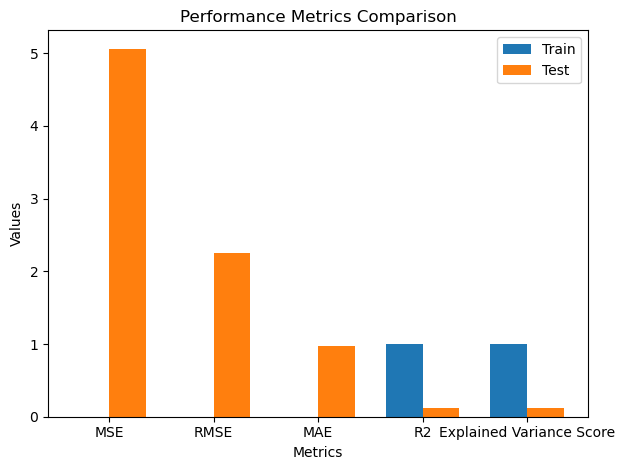

In [67]:
metrics = ['MSE', 'RMSE', 'MAE', 'R2', 'Explained Variance Score']

# 训练集上的性能指标值
train_values = [mse_train_LR, rmse_train_LR, mae_train_LR, r2_train_LR, explained_variance_train_LR]

# 测试集上的性能指标值
test_values = [mse_test_LR, rmse_test_LR, mae_test_LR, r2_test_LR, explained_variance_test_LR]

# 设置柱状图的宽度
bar_width = 0.35

# 计算柱状图的位置
index = np.arange(len(metrics))

# 绘制训练集上的柱状图
plt.bar(index, train_values, bar_width, label='Train')

# 绘制测试集上的柱状图，偏移 bar_width 以使其位于训练集柱状图的旁边
plt.bar(index + bar_width, test_values, bar_width, label='Test')

# 添加标签和标题
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics Comparison')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# 自适应调整布局
plt.tight_layout()


In [37]:
cross_val_scores_model_MSE = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_scores_model_MAE = -1*cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cross_val_scores_model_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
print(cross_val_scores_model_MSE)
print("Average CV Score for MSE:      ", cross_val_scores_model_MSE.mean())
print("Average CV Score for RMSE:     ", np.sqrt(-1*cross_val_scores_model_MSE).mean())
print(cross_val_scores_model_MAE)
print("Average CV Score for MAE:      ", cross_val_scores_model_MAE.mean())
print(cross_val_scores_model_r2)
print("Average CV Score for r2:       ", cross_val_scores_model_r2.mean())

[ -3.31823105  -2.38985665 -20.87260294  -2.71767792 -10.74511251]
Average CV Score for MSE:       -8.008696213280489
Average CV Score for RMSE:      2.5725367400993564
[1.56248802 1.3525338  1.5832893  1.13918977 2.32081701]
Average CV Score for MAE:       1.5916635783234334
[-1.62814380e+00 -1.35784454e+01 -6.41003360e-03 -3.49593277e+00
  3.37766596e-02]
Average CV Score for r2:        -3.735031065911163


In [39]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor()

In [40]:
dtree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
y_pred_Dtree_train = dtree_reg.predict(X_train)
y_pred_Dtree_test = dtree_reg.predict(X_test)

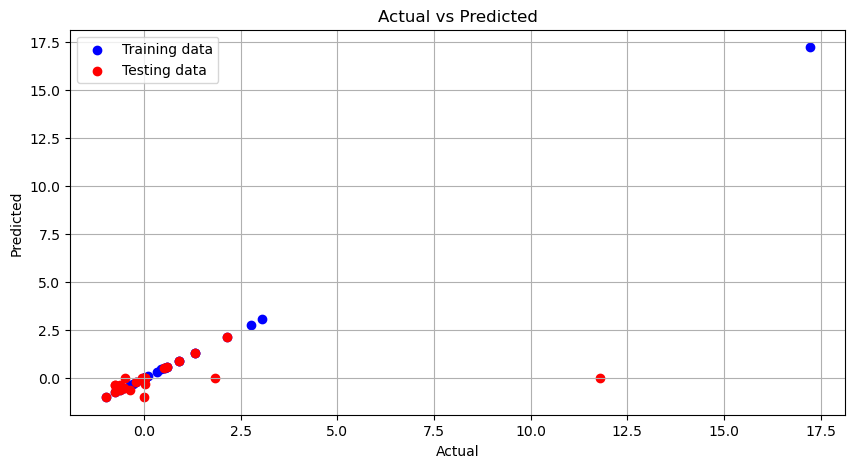

In [48]:
# 绘制预测值与实际值的对比散点图
plt.figure(figsize=(10, 5))

plt.scatter(y_train, y_pred_Dtree_train, color='blue', label='Training data')
plt.scatter(y_test, y_pred_Dtree_test, color='red', label='Testing data')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)

plt.show()

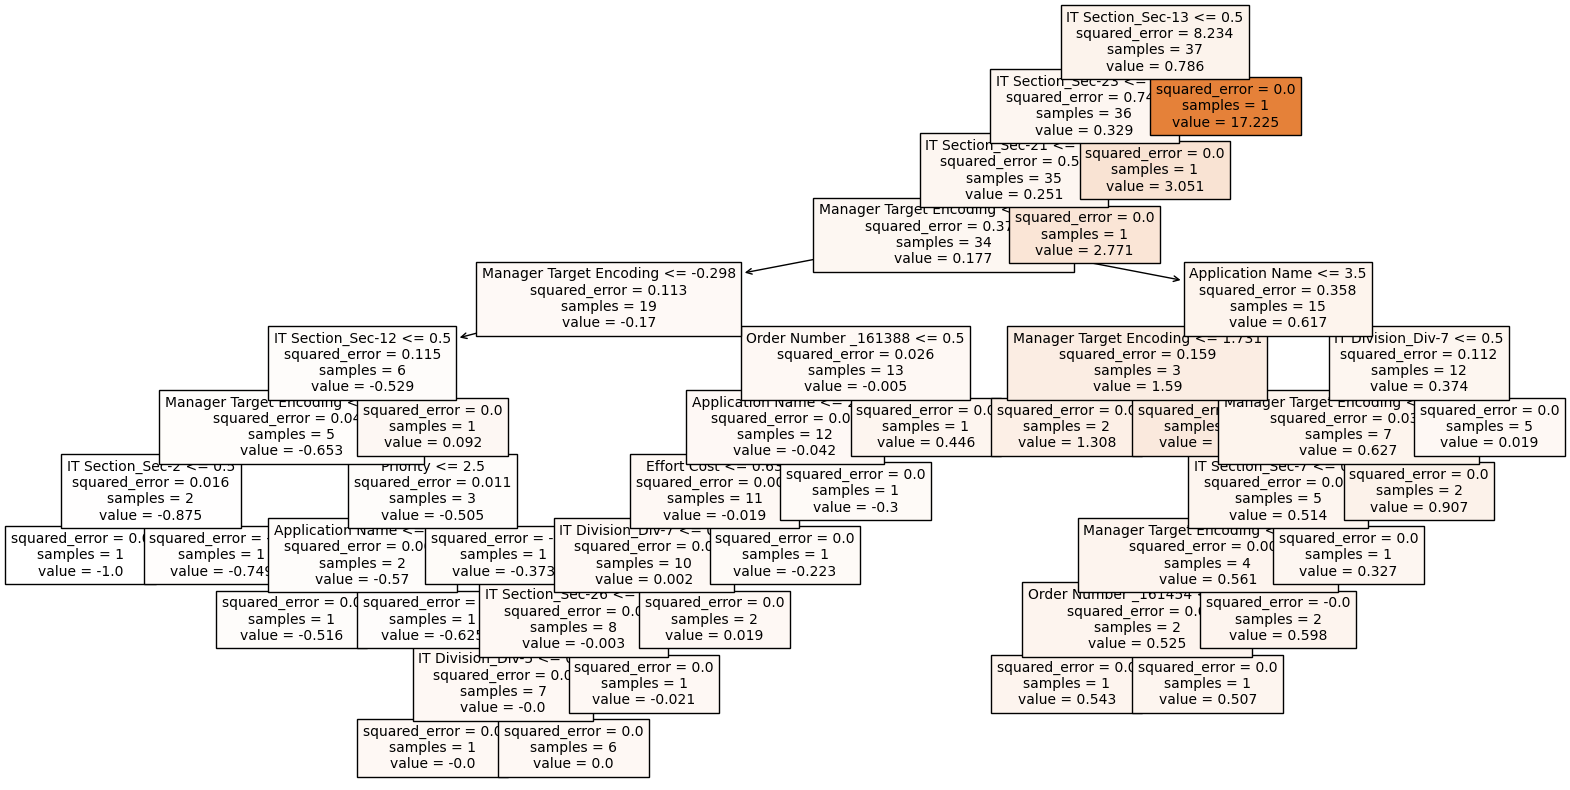

In [46]:
from sklearn.tree import plot_tree
feature_names = X.columns.tolist()

plt.figure(figsize=(20, 10))
plot_tree(dtree_reg, feature_names=feature_names, filled=True, fontsize=10)
plt.show()

In [68]:
mse_train_Dtree = mean_squared_error(y_train, y_pred_Dtree_train)
rmse_train_Dtree = np.sqrt(mse_train_Dtree)
mae_train_Dtree = mean_absolute_error(y_train, y_pred_Dtree_train)
r2_train_Dtree = r2_score(y_train, y_pred_Dtree_train)

mse_test_Dtree = mean_squared_error(y_test, y_pred_Dtree_test)
rmse_test_Dtree = np.sqrt(mse_test_Dtree)
mae_test_Dtree = mean_absolute_error(y_test, y_pred_Dtree_test)
r2_test_Dtree = r2_score(y_test, y_pred_Dtree_test)

print("Mean Squared Error (MSE_train):      ", mse_train_Dtree)
print("Root Mean Squared Error (RMSE_train):", rmse_train_Dtree)
print("Mean Absolute Error (MAE_train):      ", mae_train_Dtree)
print("R-squared (R2_train):                ", r2_train_Dtree)
explained_variance_train_Dtree = explained_variance_score(y_train, y_pred_Dtree_train)
print("Explained Variance Score_train:      ", explained_variance_train_Dtree, end='\n\n')

print("Mean Squared Error (MSE_test):       ", mse_test_Dtree)
print("Root Mean Squared Error (RMSE_test) :", rmse_test_Dtree)
print("Mean Absolute Error (MAE_test):      ", mae_test_Dtree)
print("R-squared (R2_test):                 ", r2_test_Dtree)
explained_variance_test_Dtree = explained_variance_score(y_test, y_pred_Dtree_test)
print("Explained Variance Score:            ", explained_variance_test_Dtree)

Mean Squared Error (MSE_train):       5.409520796498473e-33
Root Mean Squared Error (RMSE_train): 7.35494445696123e-17
Mean Absolute Error (MAE_train):       2.700542492331462e-17
R-squared (R2_train):                 1.0
Explained Variance Score_train:       1.0

Mean Squared Error (MSE_test):        5.5461437302184695
Root Mean Squared Error (RMSE_test) : 2.3550252079794114
Mean Absolute Error (MAE_test):       0.6451668939605828
R-squared (R2_test):                  0.030613454404663676
Explained Variance Score:             0.07814090157129872


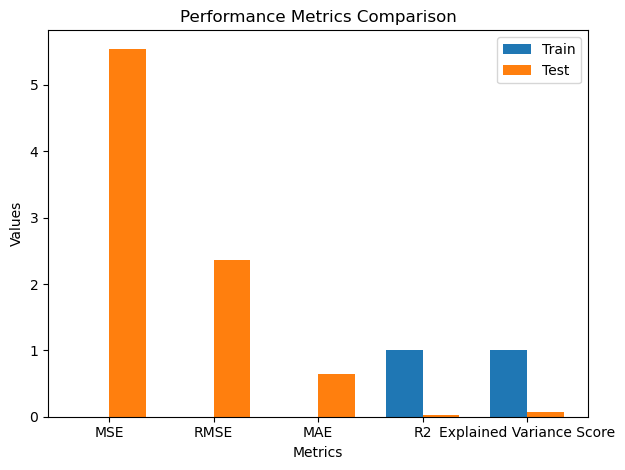

In [69]:
metrics = ['MSE', 'RMSE', 'MAE', 'R2', 'Explained Variance Score']

# 训练集上的性能指标值
train_values = [mse_train_Dtree, rmse_train_Dtree, mae_train_Dtree, r2_train_Dtree, explained_variance_train_Dtree]

# 测试集上的性能指标值
test_values = [mse_test_Dtree, rmse_test_Dtree, mae_test_Dtree, r2_test_Dtree, explained_variance_test_Dtree]

# 设置柱状图的宽度
bar_width = 0.35

# 计算柱状图的位置
index = np.arange(len(metrics))

# 绘制训练集上的柱状图
plt.bar(index, train_values, bar_width, label='Train')

# 绘制测试集上的柱状图，偏移 bar_width 以使其位于训练集柱状图的旁边
plt.bar(index + bar_width, test_values, bar_width, label='Test')

# 添加标签和标题
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics Comparison')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# 自适应调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [52]:
cross_val_scores_dtree_reg_MSE = cross_val_score(dtree_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_scores_dtree_reg_MAE = -1*cross_val_score(dtree_reg, X, y, cv=5, scoring='neg_mean_absolute_error')
cross_val_scores_dtree_reg_R2 = cross_val_score(dtree_reg, X, y, cv=5, scoring='r2')
print(cross_val_scores_dtree_reg_MSE)
print("Average CV Score_MSE:          ", cross_val_scores_dtree_reg_MSE.mean())
print("Average CV Score for RMSE:     ", np.sqrt(-1*cross_val_scores_dtree_reg_MSE).mean())
print(cross_val_scores_dtree_reg_MAE)
print("Average CV Score for MAE:      ", cross_val_scores_dtree_reg_MAE.mean())
print(cross_val_scores_dtree_reg_R2)
print("Average CV Score_R2:           ", cross_val_scores_dtree_reg_R2.mean())

[ -1.10730575  -1.4602166  -22.82464289  -0.49217188 -12.8240727 ]
Average CV Score_MSE:           -7.741681963766584
Average CV Score for RMSE:      2.264163111642871
[0.8314327  1.0087497  1.55039426 0.44088965 1.56073108]
Average CV Score for MAE:       1.0784394803358346
[ 0.39706893 -2.33480802 -0.10052849  0.14808599 -0.14603188]
Average CV Score_R2:            -0.4072426934964099


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred_rf_train = rf_regressor.predict(X_train)
y_pred_rf_test = rf_regressor.predict(X_test)

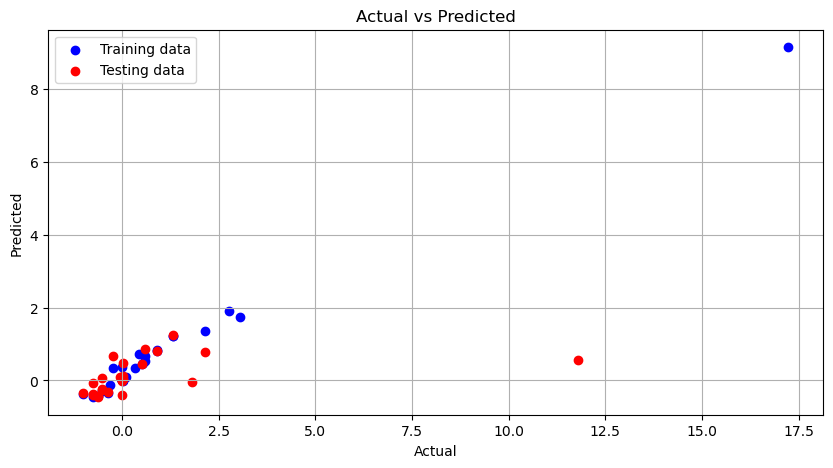

In [56]:
# 绘制预测值与实际值的对比散点图
plt.figure(figsize=(10, 5))

plt.scatter(y_train, y_pred_rf_train, color='blue', label='Training data')
plt.scatter(y_test, y_pred_rf_test, color='red', label='Testing data')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)

plt.show()

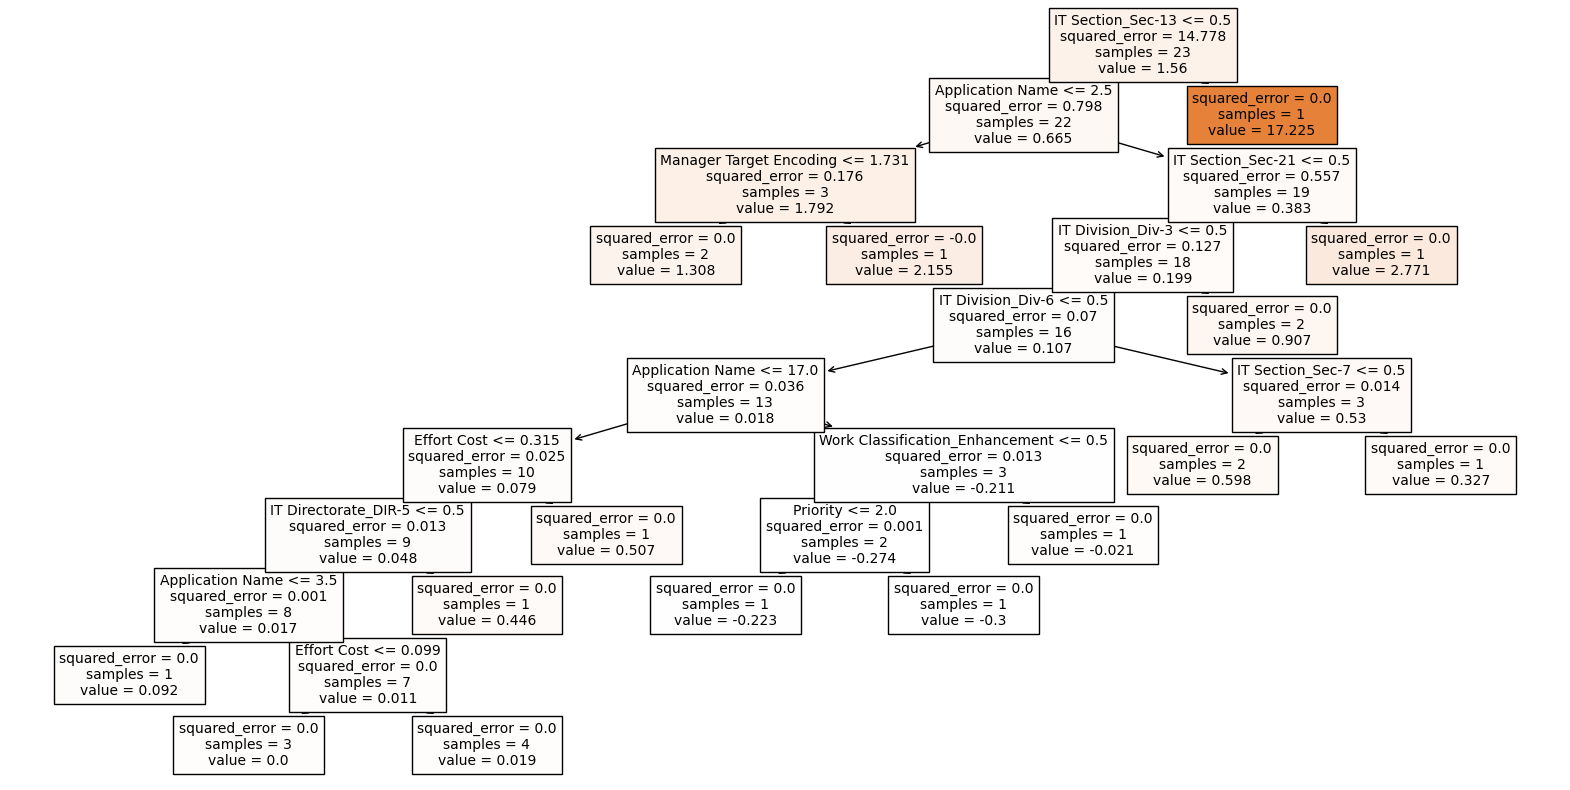

In [57]:
plt.figure(figsize=(20, 10))
from sklearn.tree import plot_tree
plot_tree(rf_regressor.estimators_[0], feature_names=X.columns.tolist(), filled=True, fontsize=10)
plt.show()

In [70]:
mse_train = mean_squared_error(y_train, y_pred_rf_train)
rmse_train= np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_rf_train)
r2_train = r2_score(y_train, y_pred_rf_train)

mse_test = mean_squared_error(y_test, y_pred_rf_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_rf_test)
r2_test = r2_score(y_test, y_pred_rf_test)

print("Mean Squared Error (MSE_train):      ", mse_train)
print("Root Mean Squared Error (RMSE_train):", rmse_train)
print("Mean Absolute Error (MAE_train):      ", mae_train)
print("R-squared (R2):                      ", r2_train)
explained_variance_train = explained_variance_score(y_train, y_pred_rf_train)
print("Explained Variance Score:            ", explained_variance_train, end='\n\n')

print("Mean Squared Error (MSE_test):       ", mse_test)
print("Root Mean Squared Error (RMSE_test): ", rmse_test)
print("Mean Absolute Error (MAE_test):      ", mae_train)
print("R-squared (R2):                      ", r2_test)
explained_variance_test = explained_variance_score(y_test, y_pred_rf_test)
print("Explained Variance Score:            ", explained_variance_test)

Mean Squared Error (MSE_train):       1.8852451605130802
Root Mean Squared Error (RMSE_train): 1.3730423010647124
Mean Absolute Error (MAE_train):       0.39933818753807393
R-squared (R2):                       0.7710280975937762
Explained Variance Score:             0.7775172685846592

Mean Squared Error (MSE_test):        5.1826180465466365
Root Mean Squared Error (RMSE_test):  2.2765364145004656
Mean Absolute Error (MAE_test):       0.39933818753807393
R-squared (R2):                       0.09415254099734738
Explained Variance Score:             0.11773390875953094


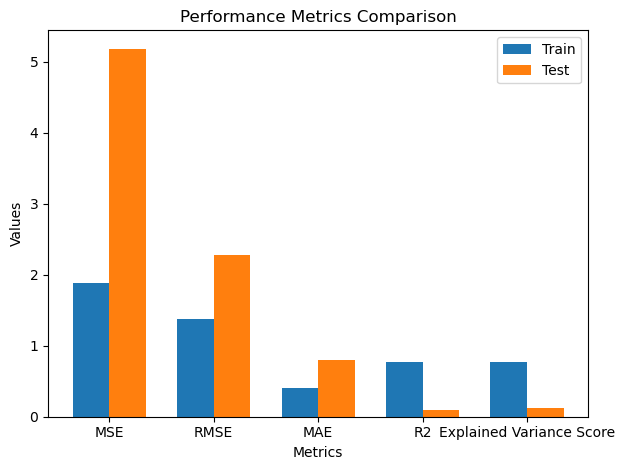

In [71]:
# 定义性能指标名称
metrics = ['MSE', 'RMSE', 'MAE', 'R2', 'Explained Variance Score']

# 训练集上的性能指标值
train_values = [mse_train, rmse_train, mae_train, r2_train, explained_variance_train]

# 测试集上的性能指标值
test_values = [mse_test, rmse_test, mae_test, r2_test, explained_variance_test]

# 设置柱状图的宽度
bar_width = 0.35

# 计算柱状图的位置
index = np.arange(len(metrics))

# 绘制训练集上的柱状图
plt.bar(index, train_values, bar_width, label='Train')

# 绘制测试集上的柱状图，偏移 bar_width 以使其位于训练集柱状图的旁边
plt.bar(index + bar_width, test_values, bar_width, label='Test')

# 添加标签和标题
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics Comparison')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

# 自适应调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [72]:
cross_val_scores_rf_regressor_MSE = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_scores_rf_regressor_MAE = -1*cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')
cross_val_scores_rf_regressor_R2 = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')
print(cross_val_scores_rf_regressor_MSE)
print("Average CV Score_MSE:", cross_val_scores_rf_regressor_MSE.mean())
print("Average CV Score for RMSE:     ", np.sqrt(-1*cross_val_scores_rf_regressor_MSE).mean())
print(cross_val_scores_rf_regressor_MAE)
print("Average CV Score for MAE:      ", cross_val_scores_rf_regressor_MAE.mean())
print(cross_val_scores_rf_regressor_R2)
print("Average CV Score_R2:", cross_val_scores_rf_regressor_R2.mean())

[ -0.7751391   -0.27931243 -22.17431865  -0.73179184 -12.20958327]
Average CV Score_MSE: -7.234029058908645
Average CV Score for RMSE:      2.093510255910649
[0.56073891 0.38761452 1.87356941 0.71597427 1.65389484]
Average CV Score for MAE:       1.0383583881019938
[ 0.41273351 -0.55450775 -0.05658227 -0.79788421 -0.09037274]
Average CV Score_R2: -0.2173226925224762


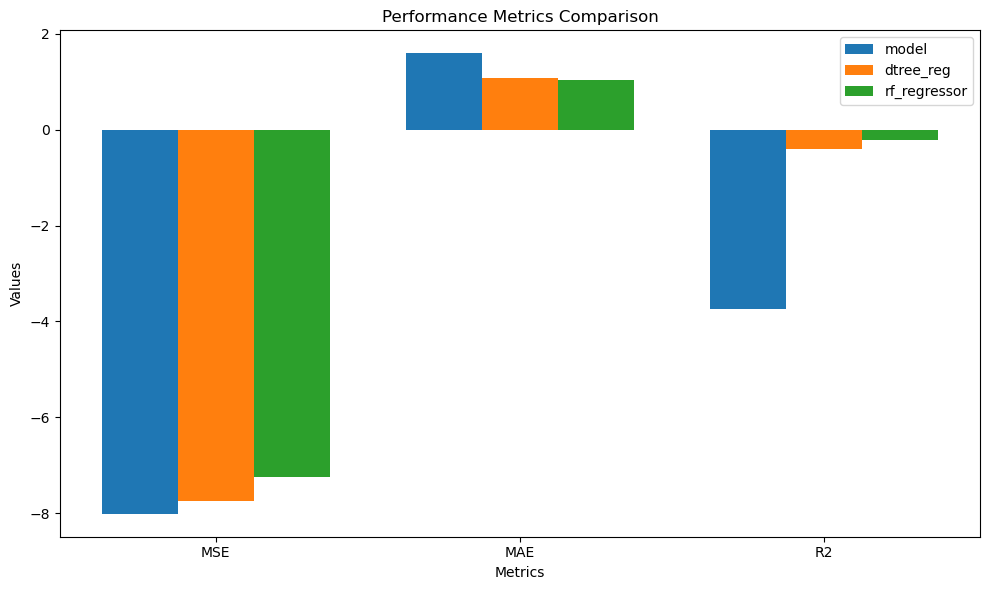

In [73]:
# 模型性能指标
models = ['model', 'dtree_reg', 'rf_regressor']
metrics = ['MSE', 'MAE', 'R2']

# 模型1的性能指标值
model1_values = [cross_val_scores_model_MSE.mean(), cross_val_scores_model_MAE.mean(), cross_val_scores_model_r2.mean()]

# 模型2的性能指标值
model2_values = [cross_val_scores_dtree_reg_MSE.mean(), cross_val_scores_dtree_reg_MAE.mean(), cross_val_scores_dtree_reg_R2.mean()]

# 模型3的性能指标值
model3_values = [cross_val_scores_rf_regressor_MSE.mean(), cross_val_scores_rf_regressor_MAE.mean(), cross_val_scores_rf_regressor_R2.mean()]

# 绘制柱状图
bar_width = 0.25
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

plt.bar(index, model1_values, bar_width, label='model')
plt.bar(index + bar_width, model2_values, bar_width, label='dtree_reg')
plt.bar(index + 2*bar_width, model3_values, bar_width, label='rf_regressor')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics Comparison')
plt.xticks(index + bar_width, metrics)
plt.legend()

plt.tight_layout()
plt.show()